# Netflix Data Analysis

## 1. Import Python Libraries

In [204]:
!pip install plotly
!pip install openpyxl

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

## 2. Reading and Analyzing Dataset

In [206]:
filename = r"C:\Users\us352605\Downloads\What_We_Watched_A_Netflix_Engagement_Report_2023Jan-Jun.xlsx"
df = pd.read_excel(filename,header = 5, usecols = range(1,5), parse_dates = ["Release Date"])
df.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000
3,Wednesday: Season 1,Yes,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                18214 non-null  object        
 1   Available Globally?  18214 non-null  object        
 2   Release Date         4855 non-null   datetime64[ns]
 3   Hours Viewed         18214 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.3+ KB


In [208]:
df.isna().sum()/ len(df.index)

Title                  0.000000
Available Globally?    0.000000
Release Date           0.733447
Hours Viewed           0.000000
dtype: float64

## 3. Data Cleaning/Wrangling

In [209]:
df["Release Date"].sort_values(ascending=False)

5188    2023-06-30
6264    2023-06-30
4833    2023-06-30
7550    2023-06-29
549     2023-06-29
           ...    
18209          NaT
18210          NaT
18211          NaT
18212          NaT
18213          NaT
Name: Release Date, Length: 18214, dtype: datetime64[ns]

Release Date is the only Column with missing values but the missing dates cannot be replaced with any other Date.
Hence, we will keep this column as it is.
Although, the date itself doesnt provide much details and hence we will need to extract Year and Month for analysis 

## 4. Feature Engineering

In [210]:
# Getting Year and Months from the Release Date
# df["Release Year"] = df["Release Date"].dt.year
# df["Release Month"] = df["Release Date"].dt.month

df["Release Year"] = df["Release Date"].dt.year
df["Release Month"] = df["Release Date"].dt.month

# Updating the missing Year and Months with 0
df["Release Year"]=df["Release Year"].fillna(0).astype('int')
df["Release Month"]=df["Release Month"].fillna(0).astype('int')

# Updating the release date to only Year and Month
df["Release Date"] = df['Release Date'].dt.to_period('M').astype('str')

# Checking the non-null counts 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18214 non-null  object
 1   Available Globally?  18214 non-null  object
 2   Release Date         18214 non-null  object
 3   Hours Viewed         18214 non-null  int64 
 4   Release Year         18214 non-null  int32 
 5   Release Month        18214 non-null  int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 711.6+ KB


In [211]:
# Ranking the Movies on the basis of Hours Viewed
df["Overall Ranking"] = df["Hours Viewed"].rank(method='dense', ascending = False)

#create a ranking per year for Hours Viewed
df['Yearly Ranking']=df.groupby("Release Year")[["Hours Viewed"]].rank(method="dense", ascending = False)

#create a ranking per Month for Hours Viewed
df['Monthly Ranking']=df.groupby(["Release Year","Release Month"])[["Hours Viewed"]].rank(method="dense", ascending = False)

df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Release Year,Release Month,Overall Ranking,Yearly Ranking,Monthly Ranking
0,The Night Agent: Season 1,Yes,2023-03,812100000,2023,3,1.0,1.0,1.0
1,Ginny & Georgia: Season 2,Yes,2023-01,665100000,2023,1,2.0,2.0,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12,622800000,2022,12,3.0,1.0,1.0
3,Wednesday: Season 1,Yes,2022-11,507700000,2022,11,4.0,2.0,1.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05,503000000,2023,5,5.0,3.0,1.0


In [212]:
df = df[['Title','Overall Ranking', 'Yearly Ranking','Monthly Ranking', 'Release Year', 'Release Month', 'Hours Viewed', 'Release Date', 'Available Globally?']]
df.head()

,Title,Overall Ranking,Yearly Ranking,Monthly Ranking,Release Year,Release Month,Hours Viewed,Release Date,Available Globally?
0,The Night Agent: Season 1,1.0,1.0,1.0,2023,3,812100000,2023-03,Yes
1,Ginny & Georgia: Season 2,2.0,2.0,1.0,2023,1,665100000,2023-01,Yes
2,The Glory: Season 1 // 더 글로리: 시즌 1,3.0,1.0,1.0,2022,12,622800000,2022-12,Yes
3,Wednesday: Season 1,4.0,2.0,1.0,2022,11,507700000,2022-11,Yes
4,Queen Charlotte: A Bridgerton Story,5.0,3.0,1.0,2023,5,503000000,2023-05,Yes


## 5. EDA

In [213]:
print(df[["Release Year"]].groupby("Release Year", as_index=False).size())
print(df[["Release Month"]].groupby("Release Month", as_index=False).size())
# df[["Release Year","Available Globally?"]].value_counts().rename_axis(["ReleaseYear","Global"])\
# .reset_index(name="counts").sort_values(["ReleaseYear","Global"]).head(6)

    Release Year   size
0              0  13359
1           2010      8
2           2011      3
3           2012      1
4           2013     12
5           2014     28
6           2015     79
7           2016    192
8           2017    361
9           2018    595
10          2019    698
11          2020    779
12          2021    814
13          2022    956
14          2023    329
    Release Month   size
0               0  13359
1               1    363
2               2    350
3               3    419
4               4    401
5               5    382
6               6    413
7               7    363
8               8    385
9               9    416
10             10    469
11             11    429
12             12    465


#### Movie View counts by Release Year

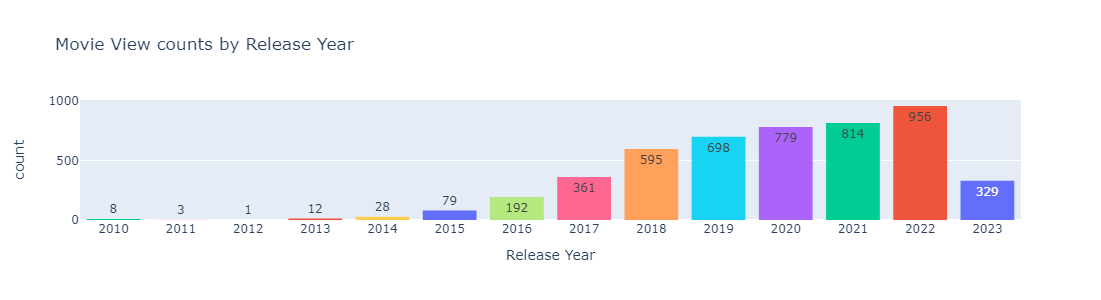

In [214]:
# We will have to filter out the Year=0 otherwise the chart will be disproportionate 

fig = px.histogram(df[df["Release Year"]>0], x="Release Year",histfunc="count", text_auto=True,\
                   title="Movie View counts by Release Year", color="Release Year")
fig.update_xaxes(type='category' , categoryorder = "category ascending")
fig.update_layout(bargap=0.2,
                  xaxis = dict(tickmode = 'linear', tick0 = 2010 ),
                  height=300,
                  showlegend=False
                 )
fig.show()

#### Movie view counts by Release Month

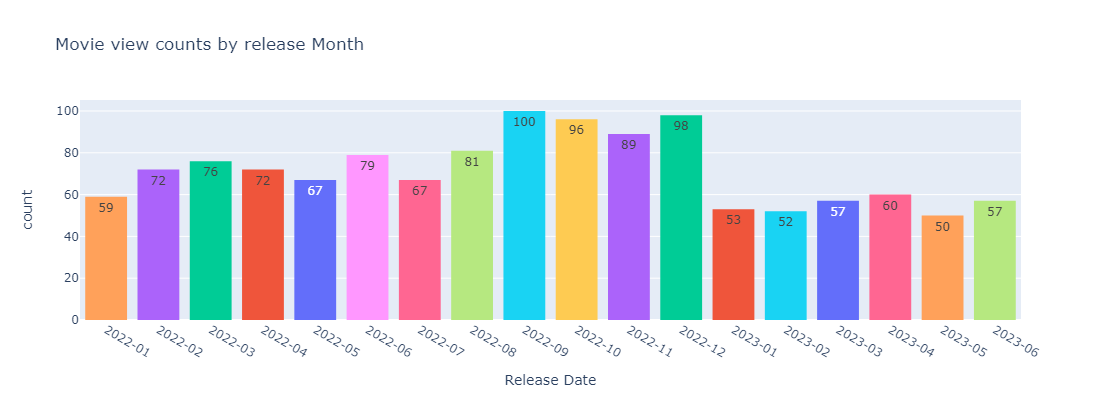

In [218]:
# We will only display months from 2022 and above  (the last 18 months )  

fig = px.histogram(df[df["Release Year"]>=2022], 
                   x="Release Date",histfunc="count", text_auto=True,\
                   title="Movie view counts by release Month", color = "Release Date")
fig.update_xaxes(type='category', categoryorder = "category ascending")
fig.update_layout(bargap=0.2,
                  xaxis = dict(tickmode = 'linear' ),
                  height=400, showlegend=False
                 )
fig.show()

#### Total hours viewed of each Release Year

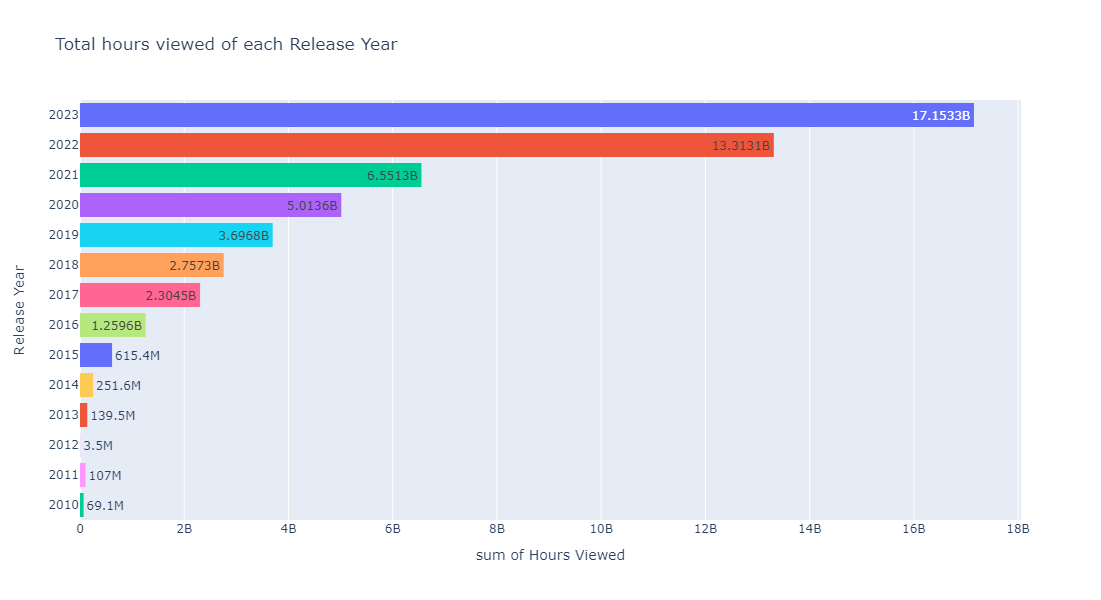

In [28]:
fig = px.histogram(df[df["Release Year"]>0], x = "Hours Viewed", y="Release Year", histfunc="sum", color="Release Year",\
                  title="Total hours viewed of each Release Year",text_auto=True,orientation='h')
fig.update_layout(bargap=0.2, height=600,
                 yaxis = dict(tickmode = 'linear'), showlegend=False)
fig.show()

#### Total viewership hours of last 18 months 

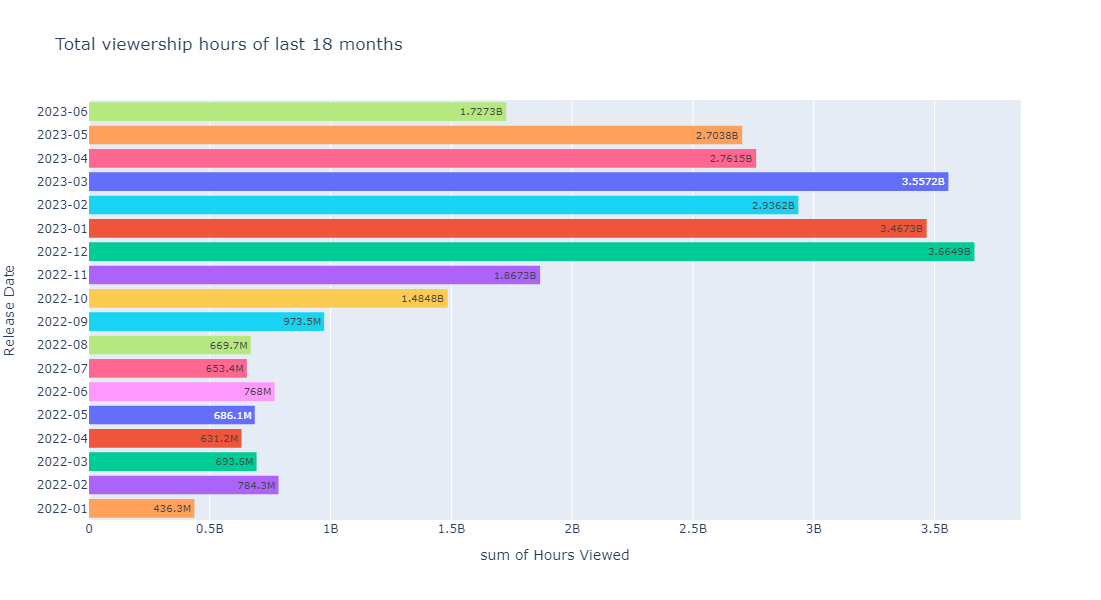

In [229]:
fig = px.histogram(df[df["Release Year"]>=2022], x = "Hours Viewed", y="Release Date", histfunc="sum", color="Release Date",
title="Total viewership hours of last 18 months",text_auto=True,orientation='h')
fig.update_yaxes(type='category', categoryorder = "category ascending")
fig.update_layout(bargap=0.2, height=600, 
                 yaxis = dict(tickmode = 'linear', categoryorder ='category ascending'), showlegend=False)

fig.show()

In [112]:
# df_maxhrs = df[df["Release Year"]>0][["Release Year","Hours Viewed"]].groupby("Release Year").max("Hours Viewed").sort_values(by="Hours Viewed", ascending = False)
# fig = px.bar(df_maxhrs, orientation='h',title="Maximum Hours Viewed Each Year",)
# fig.update_layout(
#    yaxis = dict(
#       tickmode = 'linear',
#       tick0 = 2010, 
#    )
# )
# fig.show()

#### Top 10 Shows overall

In [230]:
# Top 10 Shows overall
df[df["Overall Ranking"]<=10][["Overall Ranking","Title","Release Year"]]

,Overall Ranking,Title,Release Year
0,1.0,The Night Agent: Season 1,2023
1,2.0,Ginny & Georgia: Season 2,2023
2,3.0,The Glory: Season 1 // 더 글로리: 시즌 1,2022
3,4.0,Wednesday: Season 1,2022
4,5.0,Queen Charlotte: A Bridgerton Story,2023
5,6.0,You: Season 4,2023
6,7.0,La Reina del Sur: Season 3,2022
7,8.0,Outer Banks: Season 3,2023
8,9.0,Ginny & Georgia: Season 1,2021
9,10.0,FUBAR: Season 1,2023


#### Top Shows from each year

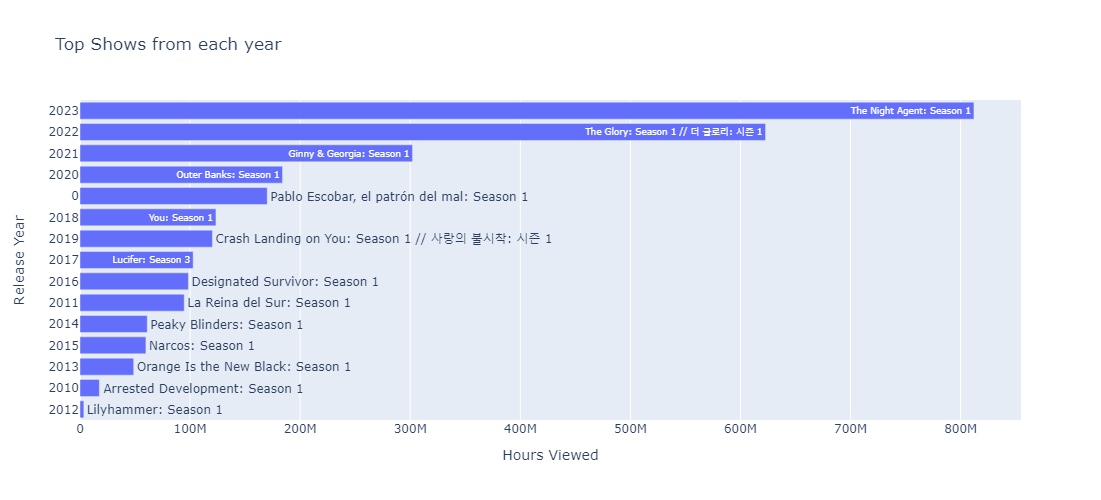

In [224]:
# Top Shows from each year

df_no1 = df[df["Yearly Ranking"]==1][["Release Year","Title","Available Globally?","Hours Viewed"]].sort_values(by="Release Year", ascending = False)

fig = px.bar(df_no1, x=df_no1["Hours Viewed"],y="Release Year", orientation='h',text="Title",height=500,title="Top Shows from each year")
fig.update_yaxes(type='category')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

#### Top Shows from Each month

In [234]:
df[(df["Monthly Ranking"]==1) & (df["Release Year"]>=2022)][["Title","Release Date","Available Globally?"]].\
sort_values(by="Release Date", ascending=False)

,Title,Release Date,Available Globally?
22,Extraction 2,2023-06,Yes
4,Queen Charlotte: A Bridgerton Story,2023-05,Yes
17,BEEF: Season 1,2023-04,Yes
0,The Night Agent: Season 1,2023-03,Yes
5,You: Season 4,2023-02,Yes
1,Ginny & Georgia: Season 2,2023-01,Yes
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12,Yes
3,Wednesday: Season 1,2022-11,Yes
43,Til Money Do Us Part: Season 1 // Hasta que la...,2022-10,No
204,DAHMER: Monster: The Jeffrey Dahmer Story,2022-09,Yes


## 6. Statistics Summary

* Movies which were release in the year 2023 and 2011 are most watched on an average
* Also, December - February month releases have the most viewers, given that these are holiday months the content would have been better than the rest
* Subscribers are least interested in watching movies of 2012
* The Night Agent SE01 has been the most watched Series overall as well as in 2023